In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import pickle
from sklearn.model_selection import train_test_split

https://www.kaggle.com/datasets/laotse/credit-risk-dataset

In [7]:
credit_df = pd.read_csv('credit_risk_dataset.csv')
credit_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [8]:
np.unique(credit_df['loan_status'], return_counts=True)

(array([0, 1]), array([25473,  7108]))

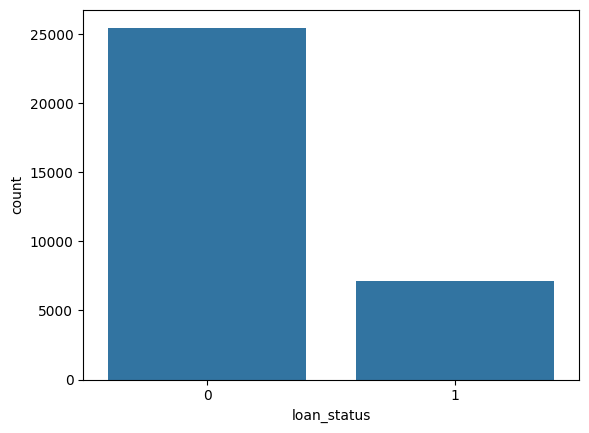

In [9]:
sns.countplot(x = credit_df['loan_status']);

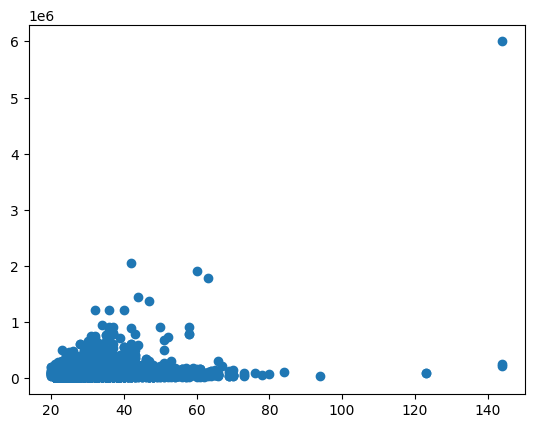

In [10]:
#People with more than 120 years make no sense and is an insconsistent value
plt.plot(credit_df['person_age'],credit_df['person_income'],'o')

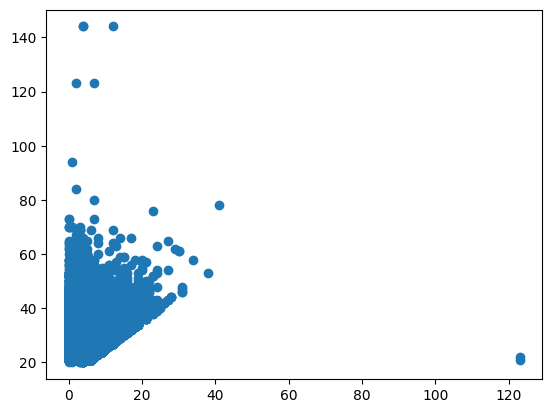

In [11]:
# We observe that has an inconsistent value because has a person with 20 years with employment length of more than 120 years
plt.plot(credit_df['person_emp_length'],credit_df['person_age'],'o')

In [12]:
grafico = px.scatter_matrix(credit_df, dimensions=['person_age', 'person_income', 'person_emp_length','loan_amnt'], color = 'loan_status')
grafico.show()

In [13]:
credit_df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [14]:
credit_df['person_emp_length'].fillna(credit_df['person_emp_length'].mean(), inplace = True)
credit_df['loan_int_rate'].fillna(credit_df['loan_int_rate'].mean(), inplace = True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18232\1620403882.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Administrator\AppData\Local\Temp\ipykernel_18232\1620403882.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

In [15]:
credit_df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [16]:
mean_age = credit_df['person_age'][credit_df['person_age'] < 100].mean()
mean_person_emp_length = credit_df['person_emp_length'][credit_df['person_emp_length'] < 100].mean()
mean_person_emp_length

np.float64(4.7824294556500995)

In [17]:
credit_df.loc[credit_df['person_age'] >100, 'person_age'] =int(mean_age)
credit_df.loc[credit_df['person_emp_length'] >100, 'person_emp_length'] =int(mean_person_emp_length)

In [18]:
grafico = px.scatter_matrix(credit_df, dimensions=['person_age', 'person_income', 'person_emp_length','loan_amnt'], color = 'loan_status')
grafico.show()

In [19]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [20]:
matrix  = credit_df.corr(numeric_only= True).round(2)

<Axes: >

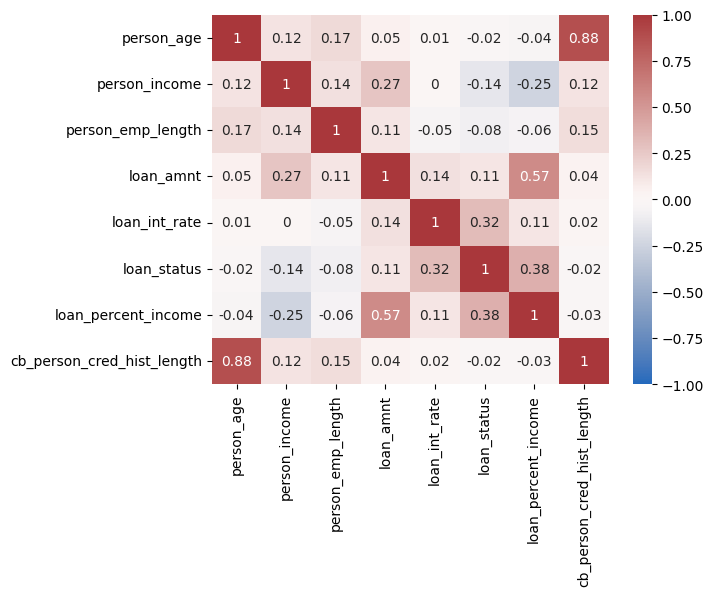

In [21]:
sns.heatmap(matrix,annot = True, vmin = -1, vmax = 1,cmap = 'vlag')

In [22]:
mask = np.triu(np.ones_like(matrix, dtype = bool))

<Axes: >

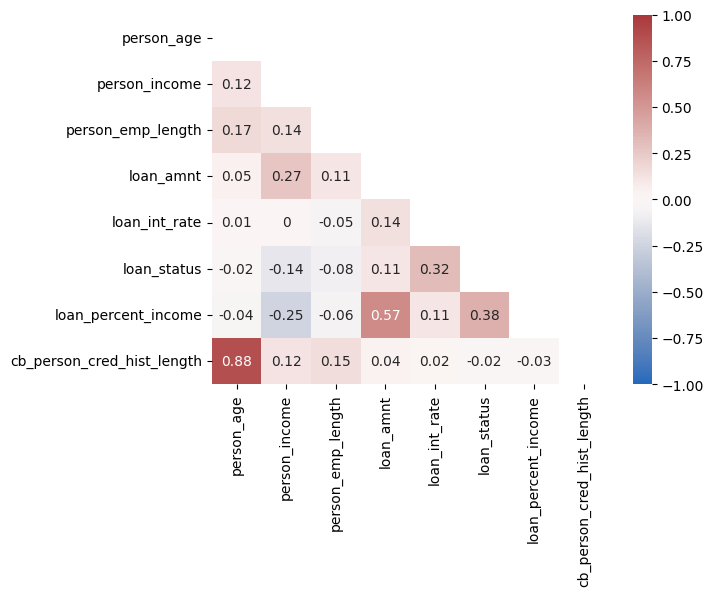

In [23]:
sns.heatmap(matrix,annot = True, vmin = -1, vmax = 1,cmap = 'vlag',mask = mask)

In [24]:
matrix = matrix.unstack()
matrix[matrix >= 0.4]

person_age                  person_age                    1.00
                            cb_person_cred_hist_length    0.88
person_income               person_income                 1.00
person_emp_length           person_emp_length             1.00
loan_amnt                   loan_amnt                     1.00
                            loan_percent_income           0.57
loan_int_rate               loan_int_rate                 1.00
loan_status                 loan_status                   1.00
loan_percent_income         loan_amnt                     0.57
                            loan_percent_income           1.00
cb_person_cred_hist_length  person_age                    0.88
                            cb_person_cred_hist_length    1.00
dtype: float64

In [25]:
credit_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,4.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [26]:
#Categorical values = person_home_ownership, loan_intent, loan_grade, cb_person_default_on_file
person_home_ownership_new = pd.get_dummies(credit_df['person_home_ownership'], dtype=float, drop_first=True)
loan_intent_new = pd.get_dummies(credit_df['loan_intent'], dtype=float, drop_first=True)
loan_grade_new = pd.get_dummies(credit_df['loan_grade'], dtype=float, drop_first=True)
cb_person_default_on_file_new = pd.get_dummies(credit_df['cb_person_default_on_file'], dtype=float, drop_first=False)
credit_new = pd.concat([credit_df, person_home_ownership_new, loan_intent_new, loan_grade_new,cb_person_default_on_file_new], axis=1)
credit_new = credit_new.drop(['person_home_ownership', 'loan_intent', 'loan_grade','cb_person_default_on_file'],axis = 1)
credit_new.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,OTHER,OWN,...,PERSONAL,VENTURE,B,C,D,E,F,G,N,Y
0,22,59000,4.0,35000,16.02,1,0.59,3,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,21,9600,5.0,1000,11.14,0,0.10,2,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,25,9600,1.0,5500,12.87,1,0.57,3,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,23,65500,4.0,35000,15.23,1,0.53,2,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,24,54400,8.0,35000,14.27,1,0.55,4,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


<Axes: >

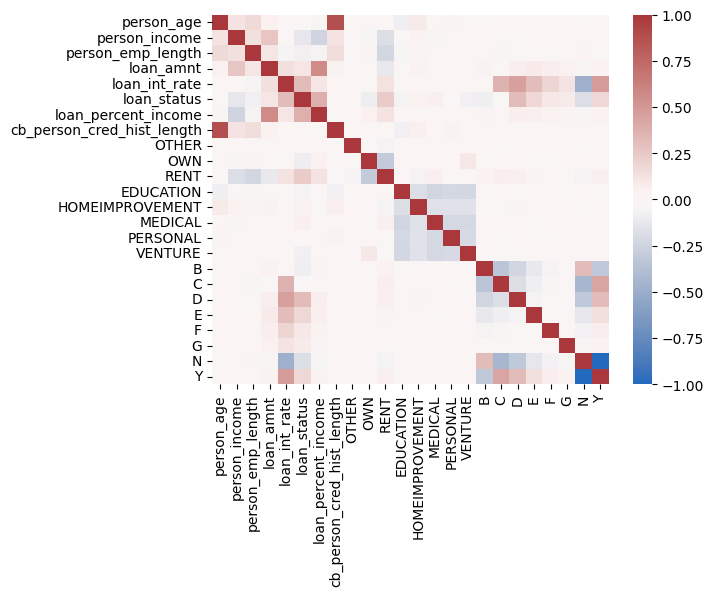

In [27]:
matrix_new  = credit_new.corr(numeric_only= True).round(2)
sns.heatmap(matrix_new, vmin = -1, vmax = 1,cmap = 'vlag')

In [28]:
y = credit_new['loan_status'].values
credit_df_predi = credit_new.drop('loan_status',axis = 1)

X = credit_df_predi.values
X

array([[2.2e+01, 5.9e+04, 4.0e+00, ..., 0.0e+00, 0.0e+00, 1.0e+00],
       [2.1e+01, 9.6e+03, 5.0e+00, ..., 0.0e+00, 1.0e+00, 0.0e+00],
       [2.5e+01, 9.6e+03, 1.0e+00, ..., 0.0e+00, 1.0e+00, 0.0e+00],
       ...,
       [6.5e+01, 7.6e+04, 3.0e+00, ..., 0.0e+00, 1.0e+00, 0.0e+00],
       [5.6e+01, 1.5e+05, 5.0e+00, ..., 0.0e+00, 1.0e+00, 0.0e+00],
       [6.6e+01, 4.2e+04, 2.0e+00, ..., 0.0e+00, 1.0e+00, 0.0e+00]],
      shape=(32581, 23))

In [37]:
X_credit_training, X_credit_test, y_credit_training, y_credit_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [38]:
with open('credit.pkl', mode = 'wb') as f:
  pickle.dump([X_credit_training, y_credit_training, X_credit_test, y_credit_test], f)